In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
df = pd.read_csv("insurance_data.csv")
df.head()

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   age               27 non-null     int64
 1   bought_insurance  27 non-null     int64
dtypes: int64(2)
memory usage: 564.0 bytes


In [7]:
df.tail()

,age,bought_insurance
22,40,1
23,45,1
24,50,1
25,54,1
26,23,0


In [8]:
df.describe()

,age,bought_insurance
count,27.000000,27.000000
mean,39.666667,0.518519
std,15.745573,0.509175
min,18.000000,0.000000
25%,25.000000,0.000000
50%,45.000000,1.000000
75%,54.500000,1.000000
max,62.000000,1.000000


In [11]:
df.columns

Index(['age', 'bought_insurance'], dtype='object')

In [12]:
df.shape

(27, 2)

In [13]:
df.isnull().sum()

age                 0
bought_insurance    0
dtype: int64

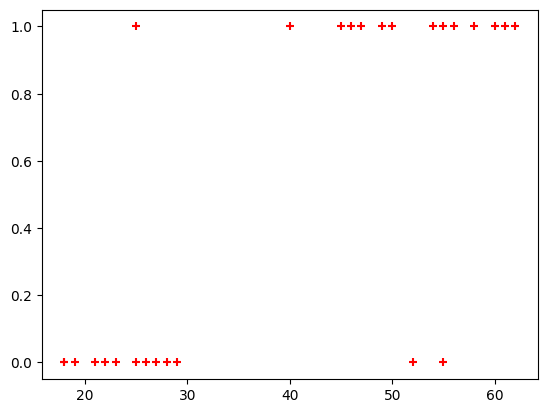

In [16]:
plt.scatter(df['age'],df['bought_insurance'], color='red', marker='+')
plt.show()

In [43]:
X = df[['age']]
y = df['bought_insurance']

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.1)

In [45]:
X_test

,age
3,52
5,56
26,23


In [52]:
y_test

3     0
5     1
26    0
Name: bought_insurance, dtype: int64

In [46]:
print(X_train.count())

age    24
dtype: int64


In [53]:
y_train

18    0
17    1
25    1
10    0
15    1
0     0
22    1
20    0
8     1
24    1
1     0
19    0
9     1
6     0
4     1
21    0
12    0
2     1
16    1
7     1
13    0
23    1
11    0
14    1
Name: bought_insurance, dtype: int64

In [48]:
print(y_train.count())

24


In [32]:
from sklearn.linear_model import LogisticRegression

In [33]:
reg = LogisticRegression()

In [49]:
reg.fit(X_train,y_train)


LogisticRegression()

In [70]:
X_test
# just a simpe list of ages
# so these are the values/ages on which our model will operate in the next cell 

,age
3,52
5,56
26,23


In [55]:
# supplying the ages to the model as said above

reg.predict(X_test)
# so basically predict() method takes a list of input and predicts the output based on the trianing 

# Answer as shown below:-
# array([1, 1, 0])

# i.e for age 53 and is 1
# i.e for age 56 and is 1
# i.e for age 23 and is 0

# which is quite promising as older people take the insurance more often than younger people


array([1, 1, 0])

In [57]:
X_test

,age
3,52
5,56
26,23


In [58]:
reg.score(X_test,y_test)
# .score() is the R square (performance matrix)

0.6666666666666666

In [59]:
reg.predict_log_proba(X_test)

array([[-2.53271465, -0.08277643],
       [-3.12681141, -0.04484823],
       [-0.11205204, -2.24429483]])

In [71]:
# Predicting for just one value

reg.predict([[26]])

C:\Users\kumaraka\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0])

In [128]:
# lets create a line from all the information we have
# prediction = mx+c
# reg.coef_ indicates value of m in y=m*x + b equation

import math
m = reg.coef_
m=m.item()
print(m)


0.15800624173671196


In [129]:
# reg.intercept_ indicates value of b in y=m*x + b equation

c = reg.intercept_
c = c.item()
print(c)

-5.766386355101927


In [130]:
# Our equation of line is complete we just need the value of age to predict the z 

z = m*age + c

NameError: name 'age' is not defined

In [134]:
# Now lets make this line as a sigmoid function to

# formula of sigmoid = 1 / (1 + math.exp(-x))
# when we make a sigmoid function then we just replace x with the line equation 

def mysigmoid(age):
        
        z = m*age + c
        sigmoid = 1 / (1 + math.exp(-z))
        print("Predicted value in int=",int(sigmoid))
        print("Predicted value in float=",sigmoid)
        
        return "Since the value is less than 0.5 the person will not take insurance" if sigmoid<0.5 else "Since the value is more than 0.5 the person will take insurance"

In [135]:
print(mysigmoid(30))

Predicted value in int= 0
Predicted value in float= 0.26382165059757945
Since the value is less than 0.5 the person will not take insurance
